# Colombian Constitution EDA.
    Brief resume about the methodology and the results that we got.

## About the Document
    The Political Constitution of the Republic of Colombia of 1991 is the Magna Carta of the Republic of Colombia. It was promulgated in the Constitutional Gazette number 114 of Thursday, July 4, 1991, and is also known as the Constitution of Human Rights. It replaced the Political Constitution of 1886 and was issued during the presidency of the liberal César Gaviria.1

## DS Pipeline



## Document Data Model

PowerPoint graph, meanwhile we can use the hierarchy of the articles dictionary

```
hierarchy = {
    'TITULO' : 'h1',
    'DISPOSICIONES' : 'h1',
    'CAPITULO' : 'h2',
    'ARTÍCULO' : 'p'

}
```

## EDA

### Libraries 

In [27]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
#import Dataset
df = pd.read_json('../constitucion_col_dict.json')

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [28]:
print("Shape of data=>",df.shape)
df.head(5)

Shape of data=> (439, 3)


/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,h1,h2,article
0,"{'head': 'TITULO I ', 'name': 'DE LOS PRINCIPI...","{'head': None, 'name': None}","{'name': 'Artículo 1', 'content': ['Artículo 1..."
1,"{'head': 'TITULO I ', 'name': 'DE LOS PRINCIPI...","{'head': None, 'name': None}","{'name': 'Artículo 2', 'content': ['Artículo 2..."
2,"{'head': 'TITULO I ', 'name': 'DE LOS PRINCIPI...","{'head': None, 'name': None}","{'name': 'Artículo 3', 'content': ['Artículo 3..."
3,"{'head': 'TITULO I ', 'name': 'DE LOS PRINCIPI...","{'head': None, 'name': None}","{'name': 'Artículo 4', 'content': ['Artículo 4..."
4,"{'head': 'TITULO I ', 'name': 'DE LOS PRINCIPI...","{'head': None, 'name': None}","{'name': 'Artículo 5', 'content': ['Artículo 5..."


### Dataset Cleaning

In [29]:
#Json format extraction
h1=df['h1'].apply(pd.Series)
h1.rename(columns={"head": "Titulos","name":"NombreTitulo"},inplace=True)
h2=df['h2'].apply(pd.Series)
h2.rename(columns={"head": "Capitulos","name":"NombreCapitulo"},inplace=True)
article=df['article'].apply(pd.Series)
article.rename(columns={"name": "Articulos","content":"Contenido"},inplace=True)
frames = [h1, h2, article]
df=pd.concat(frames, axis=1)
df.replace(r'\n','', regex=True,inplace=True) 
df['Contenido'] = df['Contenido'].str.join(',')

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [30]:
df.head()

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Titulos,NombreTitulo,Capitulos,NombreCapitulo,Articulos,Contenido
0,TITULO I,DE LOS PRINCIPIOS FUNDAMENTALES,None,None,Artículo 1,Artículo 1. Colombia es un Estado social de de...
1,TITULO I,DE LOS PRINCIPIOS FUNDAMENTALES,None,None,Artículo 2,Artículo 2. Son fines esenciales del Estado: s...
2,TITULO I,DE LOS PRINCIPIOS FUNDAMENTALES,None,None,Artículo 3,Artículo 3. La soberanía reside exclusivamente...
3,TITULO I,DE LOS PRINCIPIOS FUNDAMENTALES,None,None,Artículo 4,Artículo 4. La Constitución es norma de normas...
4,TITULO I,DE LOS PRINCIPIOS FUNDAMENTALES,None,None,Artículo 5,"Artículo 5. El Estado reconoce, sin discrimina..."


#### Sorting by  Title and chapters

In [31]:
df.set_index(['Titulos','Capitulos','Articulos'],inplace=True)
df.sort_index(inplace=True)

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [32]:
df.head()

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



NombreTitulo  \
Titulos                    Capitulos  Articulos                              
DISPOSICIONES TRANSITORIAS CAPITULO 1 Artículo transitorio 1          None   
                                      Artículo transitorio 10         None   
                                      Artículo transitorio 11         None   
                                      Artículo transitorio 12         None   
                                      Artículo transitorio 13         None   

                                                              NombreCapitulo  \
Titulos                    Capitulos  Articulos                                
DISPOSICIONES TRANSITORIAS CAPITULO 1 Artículo transitorio 1            None   
                                      Artículo transitorio 10           None   
                                      Artículo transitorio 11           None   
                                      Artículo transitorio 12           None   
                                      Artículo transitorio 13           None   

                                                                                                       Contenido  
Titulos                    Capitulos  Articulos                                                                   
DISPOSICIONES TRANSITORIAS CAPITULO 1 Artículo transitorio 1   Artículo transitorio 1. Convócase a elecciones...  
                                      Artículo transitorio 10  Artículo transitorio 10. Los decretos que expi...  
                                      Artículo transitorio 11  Artículo transitorio 11. Las facultades extrao...  
                                      Artículo transitorio 12  Artículo transitorio 12. Con el fin de facilit...  
                                      Artículo transitorio 13  Artículo transitorio 13. Dentro de los tres añ...

### Content cleaning

In [33]:
df.reset_index(inplace=True)

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [34]:
#Accent removing
df['Contenido'] = df['Contenido'].str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')

#Removing Articulo....
df['Contenido'].replace(r'[a-zA-Z\s]+\d+\.\s','', regex=True,inplace=True) 
df['Contenido'].replace(r'\n','', regex=True,inplace=True)
#lowerCase
df['Contenido'] = df['Contenido'].apply(lambda x:x.lower())
#digits Removal
df['Contenido'] = df['Contenido'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove punctuations
df['Contenido'] = df['Contenido'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
#Remove short Words
# df['Contenido'].replace(r'\b(\w{1,3})\b', '', regex=True, inplace=True)
#Remove extra spaces
df['Contenido'] = df['Contenido'].apply(lambda x: re.sub(' +',' ',x))


/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<>:12: DeprecationWarning:

invalid escape sequence \w

<>:12: DeprecationWarning:

invalid escape sequence \w

<ipython-input-34-32eca0b64140>:12: DeprecationWarning:

invalid escape sequence \w



In [35]:
df['Contenido'].head()

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0    convocase a elecciones generales del congreso ...
1    los decretos que expida el gobierno en ejercic...
2    las facultades extraordinarias a que se refier...
3    con el fin de facilitar la reincorporacion a l...
4    dentro de los tres anos siguientes a la entrad...
Name: Contenido, dtype: object

### NLP

In [36]:
import spacy
from spacy.lang.es import Spanish
spacy_stopwords = spacy.lang.es.stop_words.STOP_WORDS
# "es_core_news_sm" the Spanish model installed for eficiency

nlp = spacy.load("es_core_news_sm")



/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#### Lemmatization
        Lemmatization, is an organized & step-by-step procedure of obtaining the root form of the word. It makes use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations).

In [37]:
# Lemmatization with stopwords removal
df['lemmatized']=df['Contenido'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
# Filter for short words
df['lemmatized'].replace(r'\b(\w{1,3})\b', '', regex=True, inplace=True)
#Remove extra spaces
df['lemmatized'] = df['lemmatized'].apply(lambda x: re.sub(' +',' ',x))


/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [38]:
# Join title and title name
for index, row in df.iterrows():
    if row['NombreTitulo'] != None:
        df['Titulos'][index] = df['Titulos'][index] + ' ' + df['NombreTitulo'][index]

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [39]:
df_grouped=df[['Titulos','Capitulos','lemmatized']].groupby(by=['Titulos']).agg(lambda x:' '.join(x))
df_grouped.head(14)

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,lemmatized
Titulos,
DISPOSICIONES TRANSITORIAS,convocar elección general congreso republica c...
TITULO I DE LOS PRINCIPIOS FUNDAMENTALES,colombia social derecho organizado forma repub...
"TITULO II DE LOS DERECHOS, LAS GARANTIAS Y LOS DEBERES",derecho vida inviolable habrar pena muerte som...
TITULO III DE LOS HABITANTES Y DEL TERRITORIO,nacional colombiano nacimientoa natural colomb...
TITULO IV DE LA PARTICIPACION DEMOCRATICA Y DE LOS PARTIDOS POLITICOS,mecanismo participacion pueblo ejercicio sober...
TITULO IX DE LAS ELECCIONES Y DE LA ORGANIZACION ELECTORAL,voto derecho deber ciudadano elección ciudadan...
TITULO V DE LA ORGANIZACION DEL ESTADO,rama publico legislativa ejecutiva judicialade...
TITULO VI DE LA RAMA LEGISLATIVA,senador representante seran elegido periodo in...
TITULO VII DE LA RAMA EJECUTIVA,presidente republica simbolizar unidad naciona...


#### Term Matrix
    TF-IDF Model

In [40]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.65 ,min_df=0.35)
data=tfidf.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=tfidf.get_feature_names())
df_dtm.index=df_grouped.index
print(df_dtm.shape)
df_dtm.head()
                

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(14, 392)


,absoluto,accion,actividad,actuar,adelantar,adicional,administracion,administrar,adoptar,afinidad,...,tribunal,velar,vida,vigencia,vigente,vigilancia,virtud,votacion,voto,zona
Titulos,,,,,,,,,,,,,,,,,,,,,
DISPOSICIONES TRANSITORIAS,0.017821,0.000000,0.061118,0.000000,0.000000,0.000000,0.056855,0.0,0.016471,0.017821,...,0.016471,0.000000,0.038760,0.267315,0.017821,0.014214,0.017821,0.000000,0.014214,0.077520
TITULO I DE LOS PRINCIPIOS FUNDAMENTALES,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.211467,0.097228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"TITULO II DE LOS DERECHOS, LAS GARANTIAS Y LOS DEBERES",0.013301,0.130181,0.091232,0.014465,0.024586,0.014465,0.031826,0.0,0.012293,0.013301,...,0.012293,0.039903,0.086787,0.000000,0.013301,0.031826,0.013301,0.000000,0.010609,0.014465
TITULO III DE LOS HABITANTES Y DEL TERRITORIO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101400,0.000000,0.040438,0.110270
TITULO IV DE LA PARTICIPACION DEMOCRATICA Y DE LOS PARTIDOS POLITICOS,0.000000,0.000000,0.000000,0.000000,0.000000,0.042286,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.042286,0.000000,0.000000,0.031014,0.000000,0.035938,0.124057,0.000000


In [41]:
# https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [42]:
# import seaborn as sns
# plt.figure(figsize=(10,6))
# doc_lens = [len(d) for d in df.lemmatized]
# plt.hist(doc_lens, bins = 100)
# plt.title('Distribution of Article character length')
# plt.ylabel('Number of Articles')
# plt.xlabel('Article character length')
# sns.despine();

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Most of the Articles have between 100-200 characteres

### Visualization
#### Word cloud
        Word clouds are the visual representations of the frequency of different words present in a document. It gives importance to the more frequent words which are bigger in size compared to other less frequent words.

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



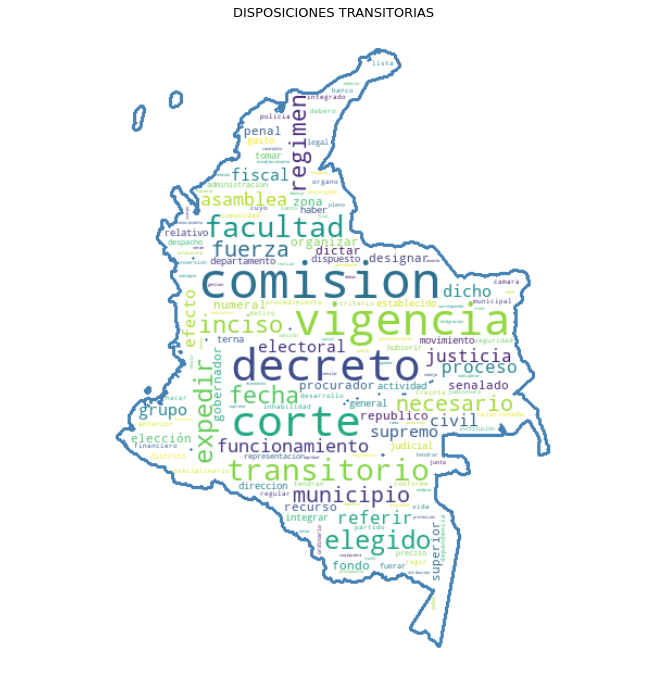

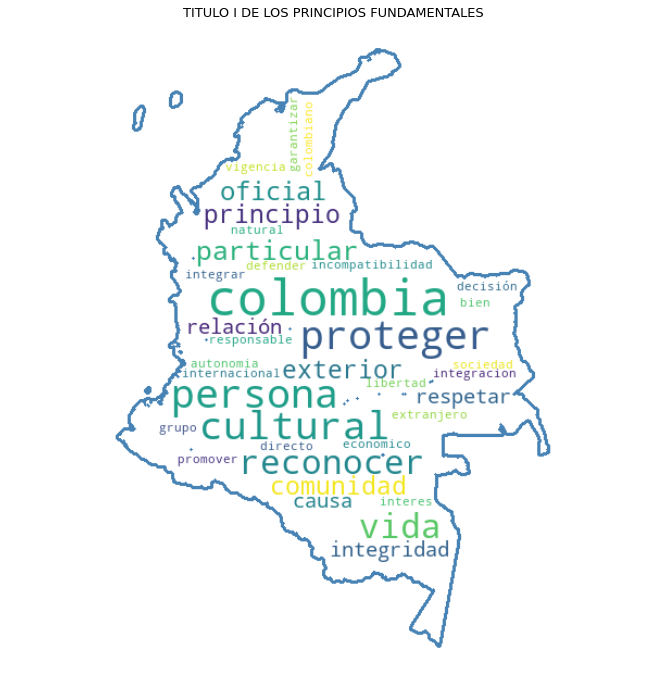

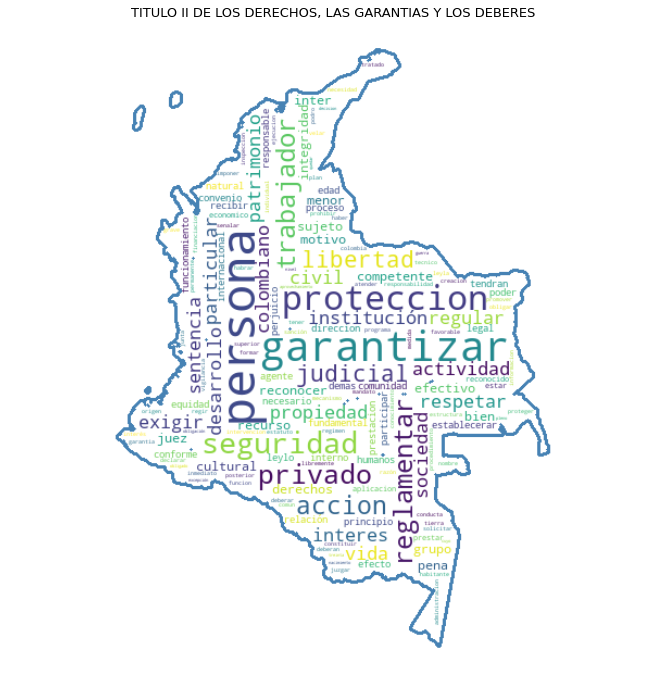

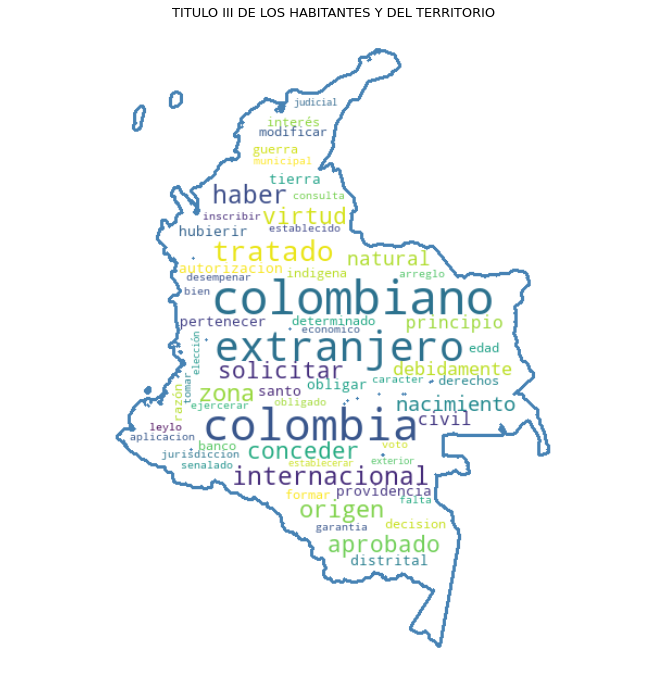

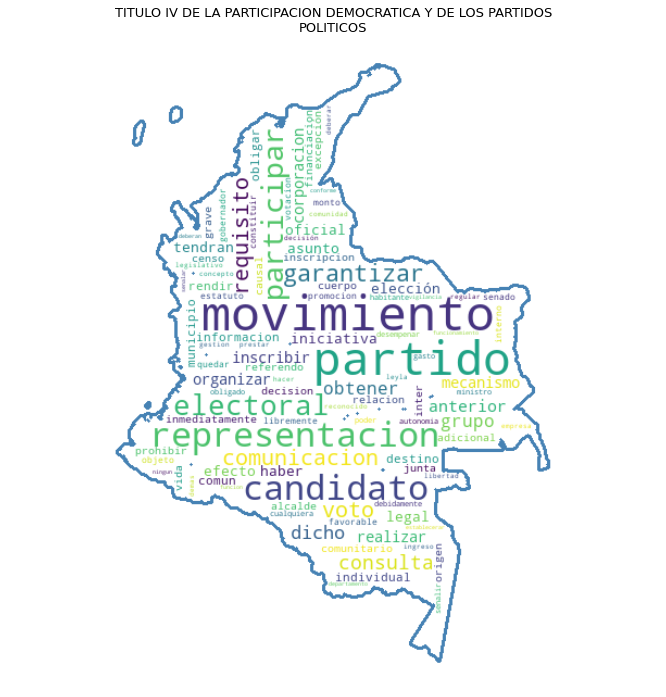

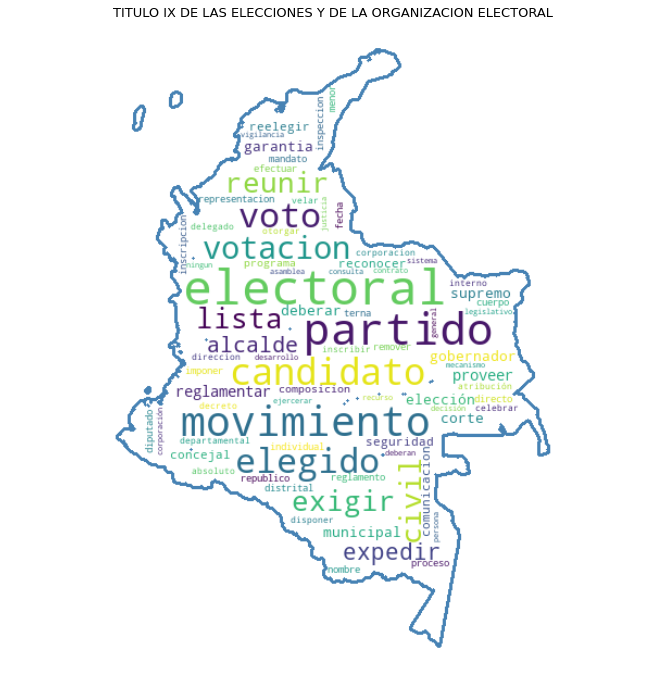

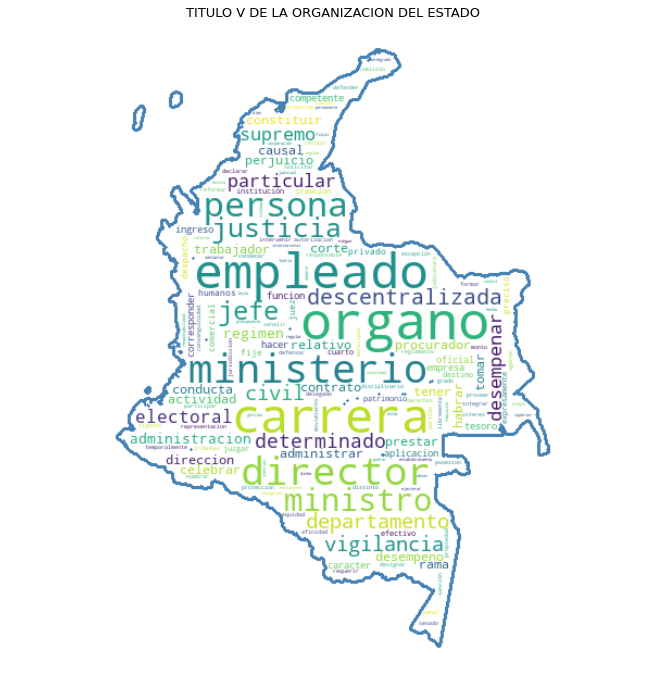

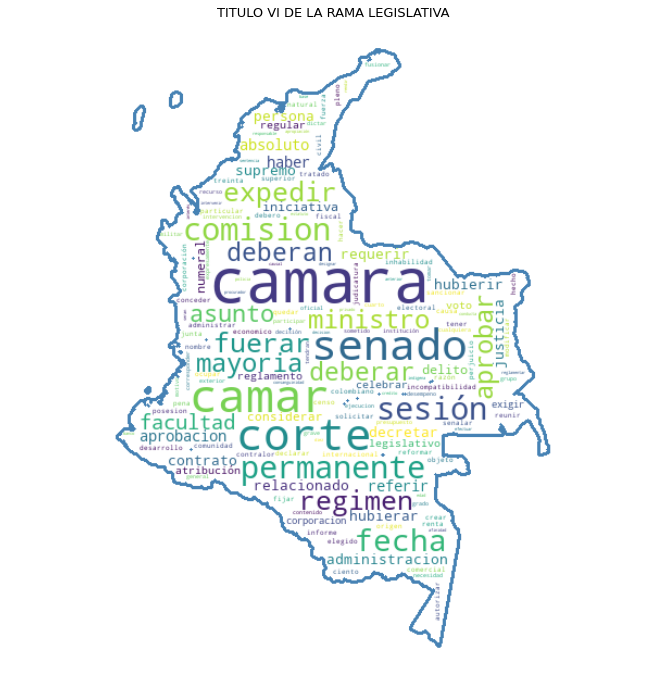

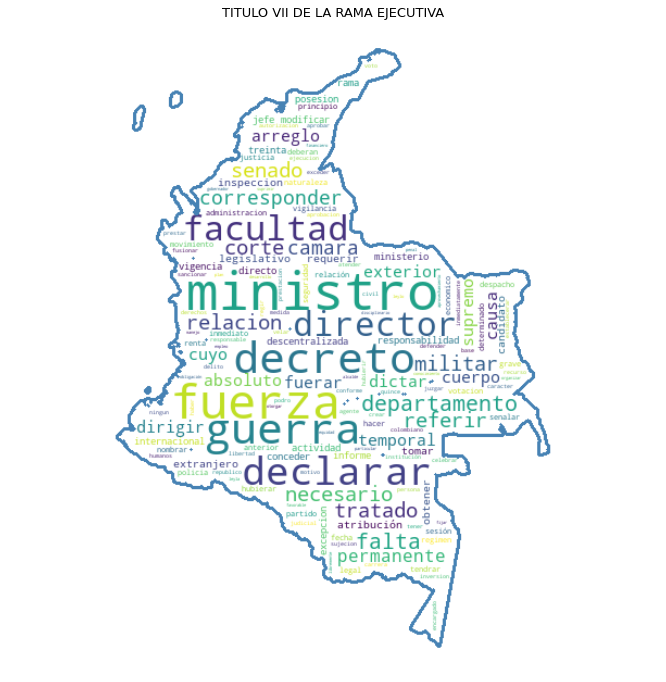

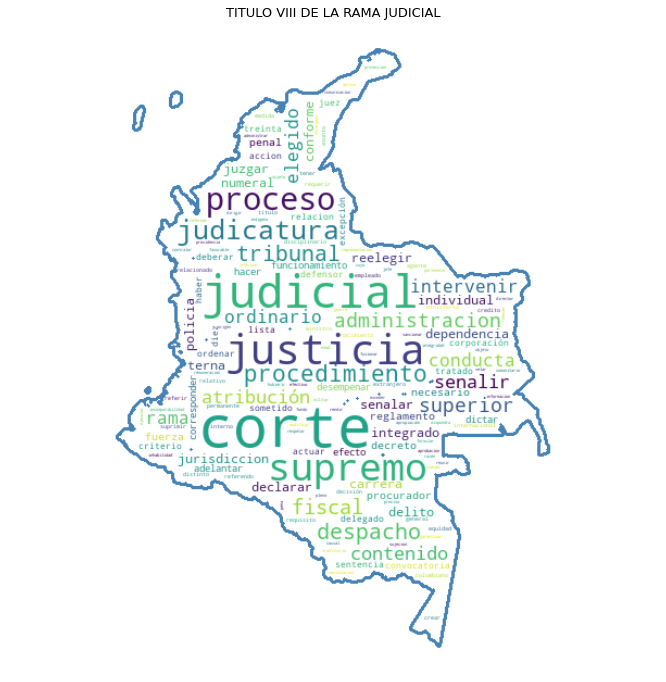

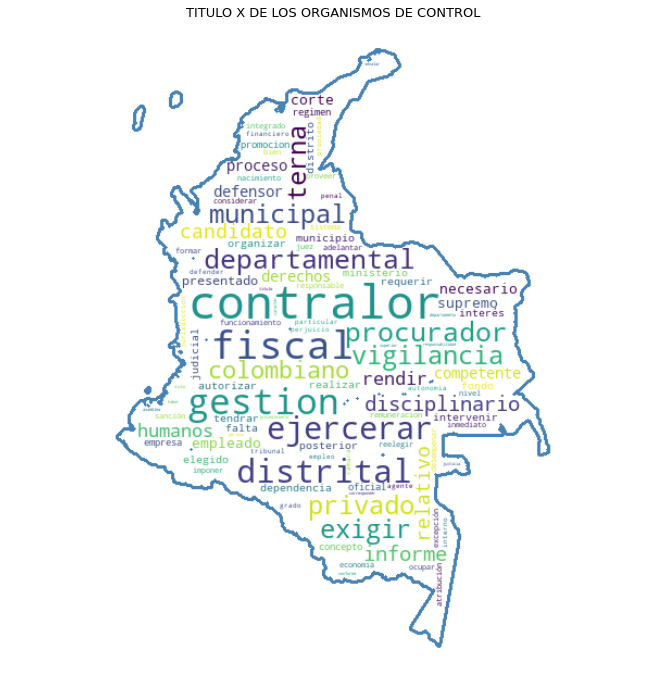

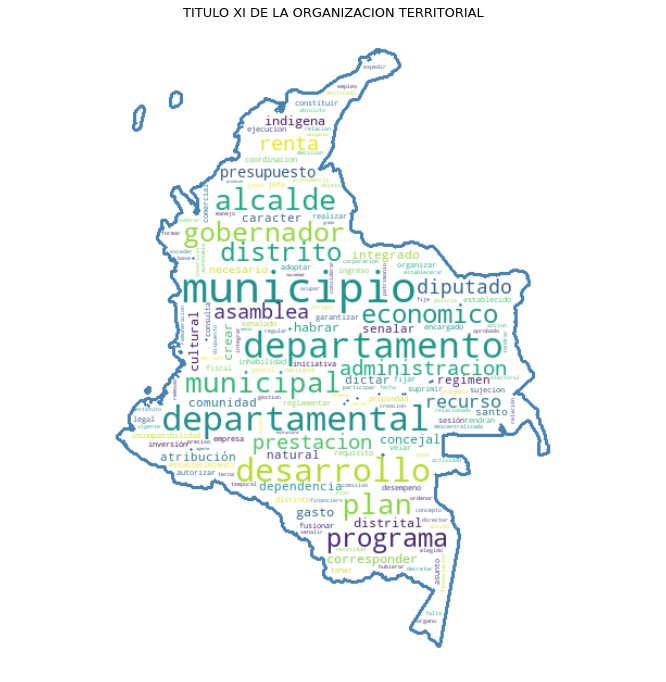

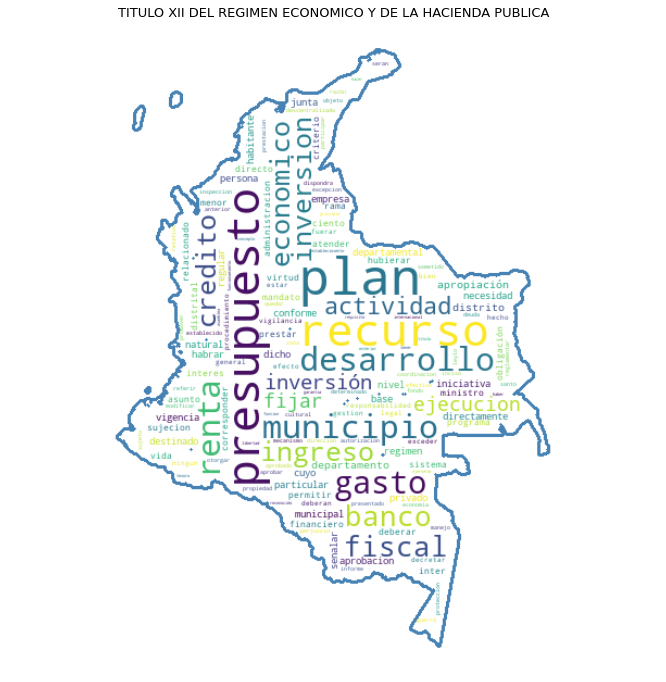

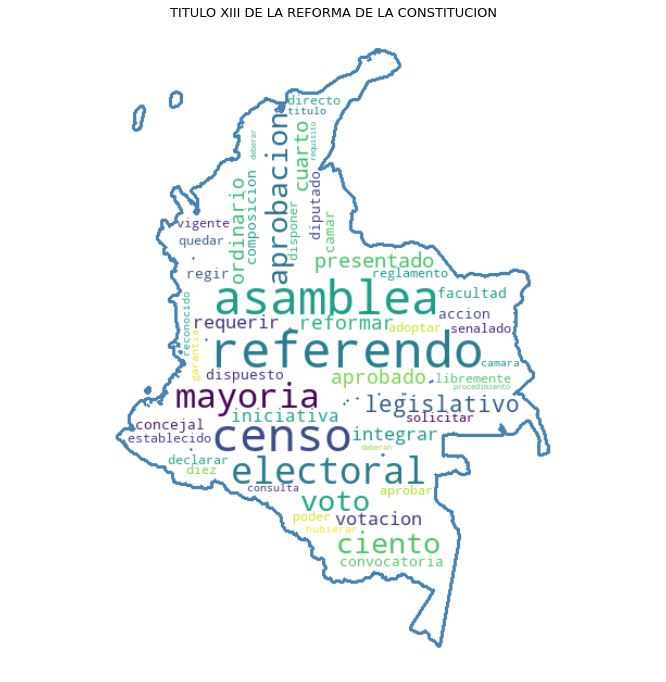

In [43]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
from PIL import Image

mapa = np.array(Image.open('./images/map.png'))
# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=800, height=660,background_color="white", max_words=150,mask=mapa, contour_width=2, contour_color='steelblue').generate_from_frequencies(data)
  
  plt.figure(figsize=(15,12))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()


# Plotting word cloud for each title
for index,Titulo in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[Titulo].sort_values(ascending=False),Titulo)

### Ngrams

#### Unigrams

In [44]:
import plotly.graph_objects as go
import plotly.express as px

def get_top_n_words(corpus, n=None):
    # vec = CountVectorizer(stop_words=STOP_WORDS).fit(corpus)
    bag_of_words = tfidf.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_grouped['lemmatized'], 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the Constitution text after removing stop words and lemmatization"))
fig.show()

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#### Bigrams

In [45]:
def get_top_n_bigram(corpus, n=None):
    tfidf = TfidfVectorizer(ngram_range=(2, 2),max_df=0.8 ,min_df=0.2).fit(corpus)
    bag_of_words = tfidf.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_grouped['lemmatized'], 20)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 bigrams in the Constitution text after removing stop words and lemmatization"))
fig.show()

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#### Trigrams

In [46]:
def get_top_n_trigram(corpus, n=None):
    tfidf = TfidfVectorizer(ngram_range=(3, 3),max_df=0.8 ,min_df=0.2).fit(corpus)
    bag_of_words = tfidf.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df_grouped['lemmatized'], 20)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 trigrams in the Constitution text"))
fig.show()

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### LDA

Nazly Santos20:30
10000
lematizacion: 4000
informacion relevante: 
TFIDF = vocabulario relevante
Nazly Santos20:31
articulo 1 
hay muchos ebrios en la escuela, que mano de ebrios, mucha ebriedad
articulo 2
Los ebrios tienen pena de carcel
articulo 3
Un ebrio se define como una persona muy borracha
D = 3
N = 30
Vocabulario =
hay, muchos, ebriols, ebrio, escuela, 
stopwords (, en, la, de, los , un)
ebrios = valor numerico
Nazly Santos20:33
frecuencia de la palabra ebrio (lematziacion) 
articulo 1
ebrio = 4
articulo
ebrio = 1
TFIDF

D= 3
TF = 12
Nazly Santos20:34
Reduccion de ruido
representacion del texto 
(embedding)
sklearn tfvectorization
Nazly Santos20:35
MxN

M = palabras importantes del vocabulario 

N= input qué tan grande quiero que sea mi vector de representacion
100, 200
50 x 100

Nazly Santos20:37
ML 
Input -> modelo ->output
modelo = topic clustering
LDA
input ? 
bag of words
hay = 1 , muchos = 2, borrachos = 3 , ebrios = 4
3,2,5,4,6,6 = articulo 1

Nazly Santos20:38   
embeddings 
hay hayan = 0.1 
TFIDF
INput =>modelo
sklearn NMF
Nazly Santos20:39
= output = listado de keywords agrupadas en clusters
Clusters = meaning
Topic es el meaning


In [47]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.sklearn
vectorizer = CountVectorizer(analyzer='word',       
                             max_df=0.6,           
                             min_df=0.4,         
                            # stop_words=spacy_stopwords,           
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=5000,          
                            )

data_vectorized = vectorizer.fit_transform(df_grouped['lemmatized'])

lda_model = LatentDirichletAllocation(n_components=10, # Number of topics
                                      learning_decay= 0.5,
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
3      32.420952   8.115230       1        1  31.315413
0       0.648955  71.707100       2        1  25.602318
4      71.019684   9.971006       3        1  13.934638
7       3.785981  33.185135       4        1  13.154739
9     -42.666500  -9.222070       5        1  12.331731
2      -3.621689 -43.526516       6        1   3.516000
5      -3.632402  -4.171708       7        1   0.036291
8     -36.584400  35.804413       8        1   0.036290
6      44.391380  50.615383       9        1   0.036290
1      40.235809 -31.591665      10        1   0.036290, topic_info=             Term       Freq      Total Category  logprob  loglift
138      ministro  40.000000  40.000000  Default  30.0000  30.0000
19         camara  48.000000  48.000000  Default  29.0000  29.0000
39          corte  83.000000  83.000000  Default  28.0000  28.0000
98         fuerza  32.000000  32.000000  Default  27.0000  27.0000
101    garantizar  39.000000  39.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
138      ministro   0.006670  40.078293  Topic10  -5.3375  -0.7795
197        senado   0.006633  27.838901  Topic10  -5.3431  -0.4207
38   corresponder   0.006628  33.505164  Topic10  -5.3439  -0.6068
102         gasto   0.006620  31.228157  Topic10  -5.3451  -0.5376
188   reglamentar   0.006613  23.465668  Topic10  -5.3461  -0.2529

[519 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.413753  absoluto
0         2  0.177323  absoluto
0         4  0.236430  absoluto
0         5  0.059108  absoluto
0         6  0.059108  absoluto
...     ...       ...       ...
217       6  0.214330    virtud
218       1  0.393381  votacion
218       2  0.078676  votacion
218       4  0.236029  votacion
218       6  0.157353  votacion

[861 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 8, 10, 3, 6, 9, 7, 2])

In [48]:
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20)

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,desarrollo,plan,presupuesto,departamental,economico,gasto,municipal,fiscal,gobernador,ingreso,alcalde,inversion,fijar,prestacion,corresponder,actividad,banco,natural,credito,cultural
Topic 1,camara,departamental,dictar,corte,permanente,cultural,comision,fiscal,relativo,decreto,desarrollo,autorizar,asunto,alcalde,administrar,delito,podrar,solicitar,tener,efectuar
Topic 2,colombiano,extranjero,electoral,partido,movimiento,candidato,municipal,tratado,votacion,garantia,corte,supremo,reglamentar,gobernador,alcalde,ejercerar,nacimiento,conceder,aprobado,inscribir
Topic 3,corte,justicia,ministro,supremo,fuerza,decreto,declarar,referir,necesario,corresponder,permanente,atribuci,senado,dictar,director,tratado,judicatura,guerra,falta,hacer
Topic 4,comision,fiscal,contralor,vigencia,gestion,procurador,corte,relativo,decreto,municipal,ejercerar,empleado,supremo,proceso,disciplinario,necesario,electoral,competente,organizar,colombiano
Topic 5,ministro,fuerza,falta,senado,camara,guerra,declarar,decreto,director,directo,candidato,arreglo,necesario,informe,corresponder,referir,tratado,absoluto,excepcion,legislativo
Topic 6,camara,mayoria,electoral,corte,comision,senado,requerir,permanente,iniciativa,quedar,absoluto,referendo,numeral,hubierar,reglamento,corporacion,ordinario,vigencia,reformar,aprobar
Topic 7,camara,movimiento,partido,electoral,mayoria,senado,comision,permanente,iniciativa,asunto,referendo,aprobar,legislativo,participar,candidato,corporacion,requerir,quedar,ministro,corte
Topic 8,camara,garantizar,movimiento,comision,senado,partido,corte,proteccion,declarar,particular,permanente,ministro,desarrollo,referir,justicia,fuerza,oficial,dictar,economico,aprobar
Topic 9,garantizar,proteccion,trabajador,reglamentar,particular,cultural,colombiano,interes,actividad,propiedad,sociedad,competente,desarrollo,natural,direccion,derechos,responsable,economico,necesario,menor


In [49]:
Topics_theme = ['Tema1', 'Tema2','Tema3', 'Tema4', 'Tema5','Tema6','Tema7','Tema8','Tema9','Tema10']
df_topic_keywords['topic_theme'] = Topics_theme
df_topic_keywords.set_index('topic_theme', inplace=True)
df_topic_keywords.T

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



topic_theme,Tema1,Tema2,Tema3,Tema4,Tema5,Tema6,Tema7,Tema8,Tema9,Tema10
Word 0,desarrollo,camara,colombiano,corte,comision,ministro,camara,camara,camara,garantizar
Word 1,plan,departamental,extranjero,justicia,fiscal,fuerza,mayoria,movimiento,garantizar,proteccion
Word 2,presupuesto,dictar,electoral,ministro,contralor,falta,electoral,partido,movimiento,trabajador
Word 3,departamental,corte,partido,supremo,vigencia,senado,corte,electoral,comision,reglamentar
Word 4,economico,permanente,movimiento,fuerza,gestion,camara,comision,mayoria,senado,particular
Word 5,gasto,cultural,candidato,decreto,procurador,guerra,senado,senado,partido,cultural
Word 6,municipal,comision,municipal,declarar,corte,declarar,requerir,comision,corte,colombiano
Word 7,fiscal,fiscal,tratado,referir,relativo,decreto,permanente,permanente,proteccion,interes
Word 8,gobernador,relativo,votacion,necesario,decreto,director,iniciativa,iniciativa,declarar,actividad
Word 9,ingreso,decreto,garantia,corresponder,municipal,directo,quedar,asunto,particular,propiedad


## Tree plot

In [50]:
from treelib import Node, Tree
tree = Tree() #Tree initialization
# df.reset_index(inplace=True)


/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [51]:
# Index creation for coming organization

for index, row in df.iterrows():
    if row['NombreCapitulo'] == None:
        df['NombreCapitulo'][index] = f"{df['Titulos'][index],df['Capitulos'][index]}"


df=df.assign(idT = (df['Titulos']).astype('category').cat.codes)
df=df.assign(idC = (df['Titulos'] + '_' +df['NombreCapitulo']).astype('category').cat.codes)
df['idA'] = range(len(df))

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [52]:
df.head()

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Titulos,Capitulos,Articulos,NombreTitulo,NombreCapitulo,Contenido,lemmatized,idT,idC,idA
0,DISPOSICIONES TRANSITORIAS,CAPITULO 1,Artículo transitorio 1,None,"('DISPOSICIONES TRANSITORIAS', 'CAPITULO 1')",convocase a elecciones generales del congreso ...,convocar elección general congreso republica c...,0,0,0
1,DISPOSICIONES TRANSITORIAS,CAPITULO 1,Artículo transitorio 10,None,"('DISPOSICIONES TRANSITORIAS', 'CAPITULO 1')",los decretos que expida el gobierno en ejercic...,decreto expidar gobierno ejercicio facultad ot...,0,0,1
2,DISPOSICIONES TRANSITORIAS,CAPITULO 1,Artículo transitorio 11,None,"('DISPOSICIONES TRANSITORIAS', 'CAPITULO 1')",las facultades extraordinarias a que se refier...,facultad extraordinario referir articulo trans...,0,0,2
3,DISPOSICIONES TRANSITORIAS,CAPITULO 1,Artículo transitorio 12,None,"('DISPOSICIONES TRANSITORIAS', 'CAPITULO 1')",con el fin de facilitar la reincorporacion a l...,facilitar reincorporacion vida civil grupo gue...,0,0,3
4,DISPOSICIONES TRANSITORIAS,CAPITULO 1,Artículo transitorio 13,None,"('DISPOSICIONES TRANSITORIAS', 'CAPITULO 1')",dentro de los tres anos siguientes a la entrad...,siguiente entrada vigencia constitucion gobie...,0,0,4


In [53]:
# Tree root.
tree.create_node("Constitucion","Cons") #root

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Node(tag=Constitucion, identifier=Cons, data=None)

In [54]:
#Node and Child creation
for index, row in df.iterrows():
    if not tree.contains((f"Tit{row['idT']}")):
        tree.create_node(row['Titulos'],(f"Tit{row['idT']}"), parent='Cons')
    if not tree.contains((f"Cap{row['idC']}")):
        tree.create_node(row['Capitulos'],(f"Cap{row['idC']}"),parent=(f"Tit{row['idT']}"))
    if not tree.contains((f"Art{row['idA']}")):
        tree.create_node(row['Articulos'],(f"Art{row['idA']}"),parent=(f"Cap{row['idC']}"))

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [55]:
tree.show()

Constitucion
├── DISPOSICIONES TRANSITORIAS
│   ├── CAPITULO 1
│   │   ├── Artículo transitorio 1
│   │   ├── Artículo transitorio 10
│   │   ├── Artículo transitorio 11
│   │   ├── Artículo transitorio 12
│   │   ├── Artículo transitorio 13
│   │   ├── Artículo transitorio 14
│   │   ├── Artículo transitorio 15
│   │   ├── Artículo transitorio 16
│   │   ├── Artículo transitorio 17
│   │   ├── Artículo transitorio 18
│   │   ├── Artículo transitorio 2
│   │   ├── Artículo transitorio 3
│   │   ├── Artículo transitorio 4
│   │   ├── Artículo transitorio 5
│   │   ├── Artículo transitorio 6
│   │   ├── Artículo transitorio 7
│   │   ├── Artículo transitorio 8
│   │   └── Artículo transitorio 9
│   ├── CAPITULO 2
│   │   ├── Artículo transitorio 20
│   │   └── Artículo transitorio 21
│   ├── CAPITULO 3
│   │   ├── Artículo transitorio 22
│   │   ├── Artículo transitorio 23
│   │   ├── Artículo transitorio 24
│   │   ├── Artículo transitorio 25
│   │   ├── Artículo transitorio 26
│   │   

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Tree visualization (pending)

In [56]:
# dot = tree.to_graphviz(filename='Constitucion.gv')

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [57]:

# from graphviz import Source
# dot = Source.from_file('Constitucion.gv')

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [58]:
# dot.render('Constitucion.gv', view=True)  

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [59]:
# Funcion que cuente h1, h2 y articulos

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [60]:
### 2) Number of paragraphs

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [61]:
### 3) Number of words

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [62]:
### 4) Lematizacion y que pasa despues

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [63]:
### 5) Most frequent relevant words

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [64]:
## TFIDF / NMF / LDA

/home/maverick/GitHub/.wslenv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

